In [51]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3, style='whitegrid', palette='Set2')
%matplotlib inline

from copy import deepcopy
from tqdm import tqdm
from IPython import display
from time import sleep

In [115]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


def make_plot(from_filename, to_filename, xlabel, ylabel, title, window_size, sep=' '):
    with open(from_filename) as f:
        data = ''.join(f.readlines())
    data = data.split(sep=sep)
    data = [float(x) for x in data]
    
    data = moving_average(data, n=window_size)
    
    fig = plt.figure(figsize=(12, 8))
    plt.plot(np.arange(len(data)), data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    fig.savefig(to_filename)

# TODO: как бороться со скачком penalty в начале?

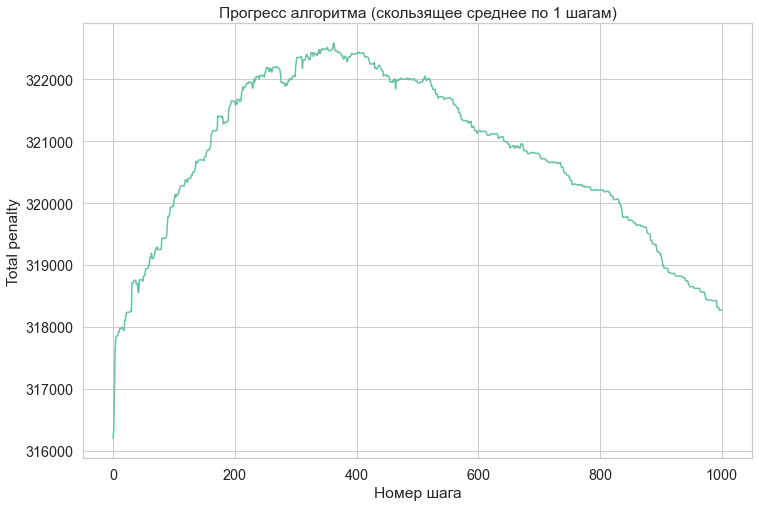

In [18]:
# Different penalties combined

window_size = 1
make_plot('results/total_penalties.txt', 'plots/total_penalties.png', 
        'Номер шага', 'Total penalty', f'Прогресс алгоритма (скользящее среднее по {window_size} шагам)', 
        window_size=window_size)

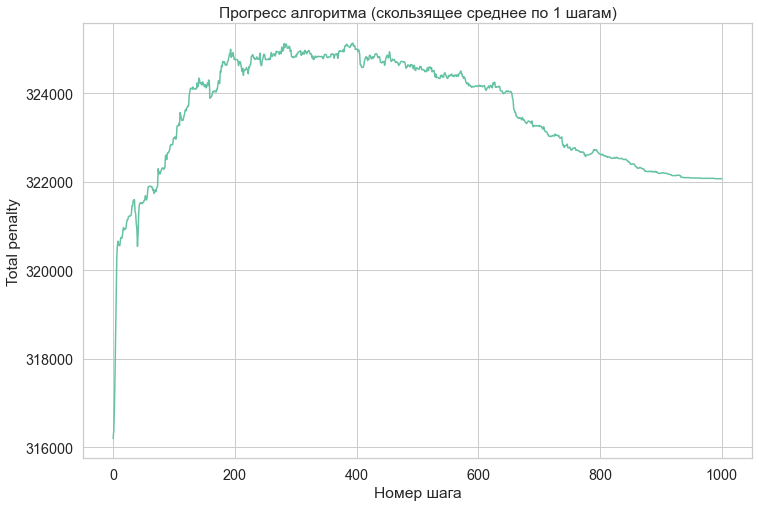

In [14]:
# SwapVertexMutation

window_size = 1
make_plot('results/total_penalties.txt', 'plots/total_penalties.png', 
        'Номер шага', 'Total penalty', f'Прогресс алгоритма (скользящее среднее по {window_size} шагам)', 
        window_size=window_size)

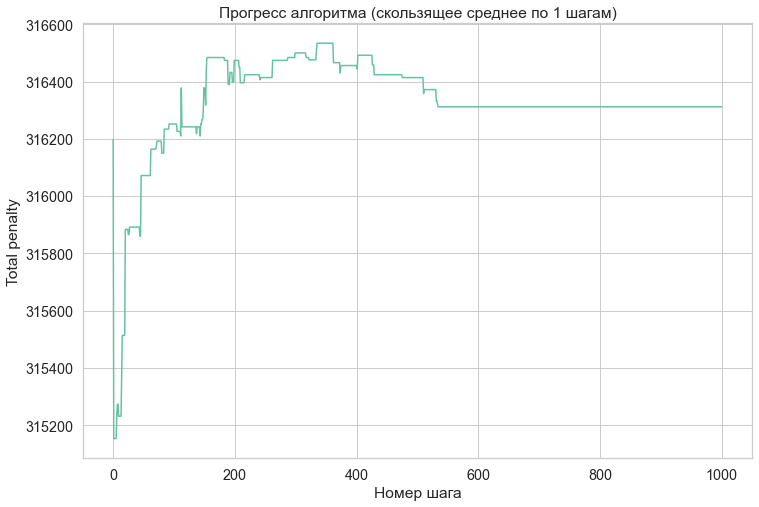

In [15]:
# TransferMutation

window_size = 1
make_plot('results/total_penalties.txt', 'plots/total_penalties.png', 
        'Номер шага', 'Total penalty', f'Прогресс алгоритма (скользящее среднее по {window_size} шагам)', 
        window_size=window_size)

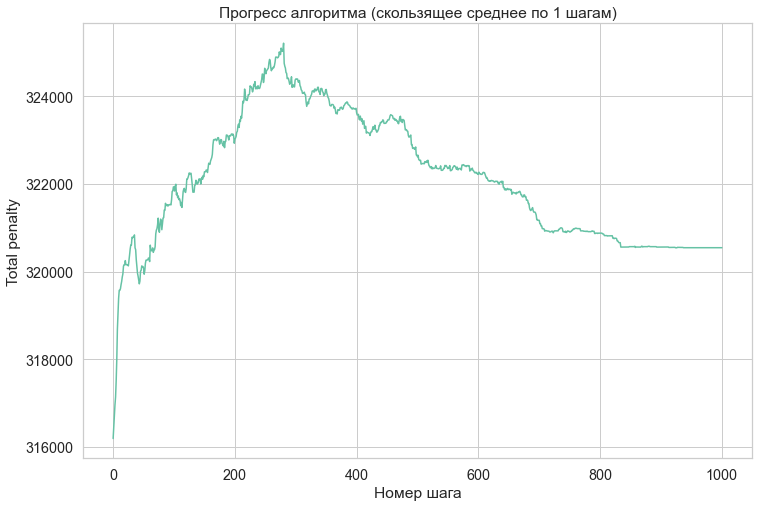

In [16]:
# SwapBetweenLinesMutation

window_size = 1
make_plot('results/total_penalties.txt', 'plots/total_penalties.png', 
        'Номер шага', 'Total penalty', f'Прогресс алгоритма (скользящее среднее по {window_size} шагам)', 
        window_size=window_size)

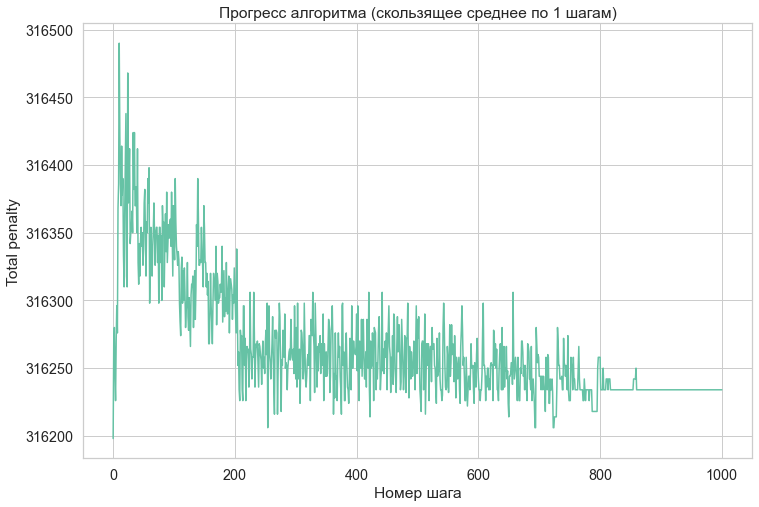

In [17]:
# SwapHeadTailMutation

window_size = 1
make_plot('results/total_penalties.txt', 'plots/total_penalties.png', 
        'Номер шага', 'Total penalty', f'Прогресс алгоритма (скользящее среднее по {window_size} шагам)', 
        window_size=window_size)

# Rectangle solution visualization

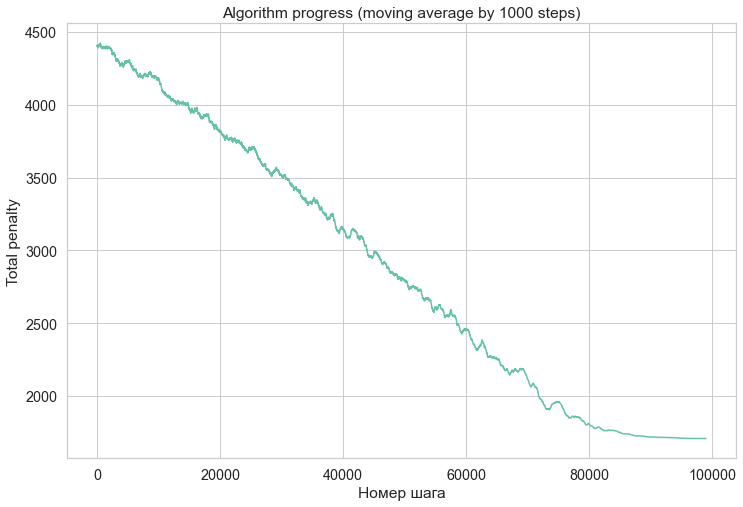

In [135]:
# Different penalties combined

window_size = 1000
make_plot('test_results/total_penalties.txt', 'plots/rectangle_total_penalties.png', 
        'Номер шага', 'Total penalty', f'Algorithm progress (moving average by {window_size} steps)', 
        window_size=window_size)
plt.savefig('penalty_convergence.png')

In [120]:
def read_file(filename):
    with open(filename) as f:
        lines = f.readlines()
    return lines

In [121]:
def transform_answer(answer):
    answer = [[int(x) for x in string.split()] for string in answer]
    return answer

In [122]:
coords = read_file('test_results/coords.txt')
initial_answer = read_file('test_results/initial_answer.txt')
final_answer = read_file('test_results/final_answer.txt')

coords = [(float(coord.strip().split()[0]), float(coord.strip().split()[1])) for coord in coords]
initial_answer = transform_answer(initial_answer)
final_answer = transform_answer(final_answer)

In [123]:
def plot_answer(coords, answer, ax=None):
    if ax is None:
        ax = plt.gca()
    answer_coords = [[coords[x] for x in line] for line in answer]
    answer_x = [[coord[0] for coord in answer_coords_line] for answer_coords_line in answer_coords]
    answer_y = [[coord[1] for coord in answer_coords_line] for answer_coords_line in answer_coords]
    
    # ax.scatter([coord[0] for coord in coords], [coord[1] for coord in coords], c='r', s=12)
    
    for i, (x, y) in enumerate(zip(answer_x, answer_y)):
        ax.plot(x, y, label=f'route {i+1}')
    ax.legend(loc='lower left')

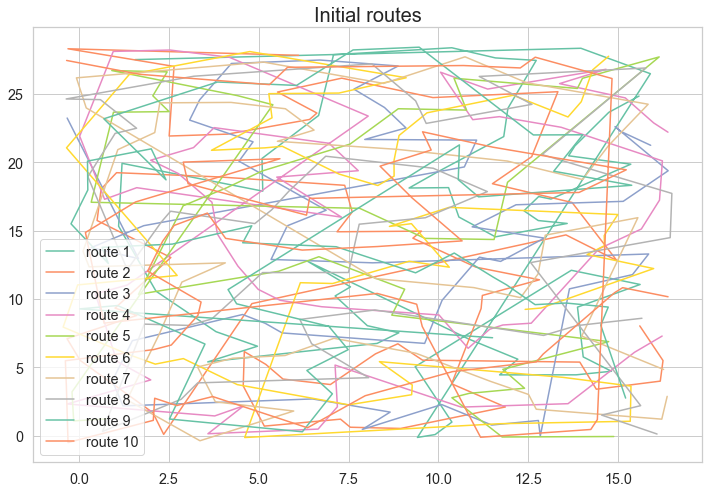

In [132]:
plt.figure(figsize=(12, 8))
plt.title('Initial routes', fontsize=20)
plot_answer(coords, initial_answer)
plt.savefig('initial_routes.png')
plt.show()

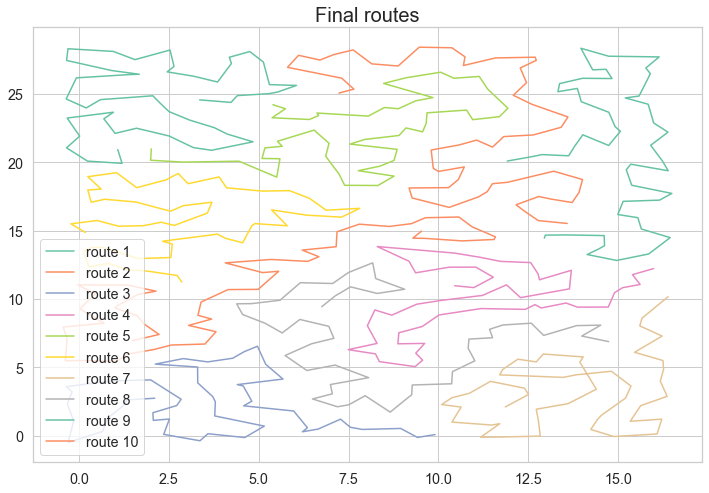

In [133]:
plt.figure(figsize=(12, 8))
plt.title('Final routes', fontsize=20)
plot_answer(coords, final_answer)
plt.savefig('final_routes.png')
plt.show()

# Progress visualization by checkpoints

In [126]:
def plot_checkpoints(n, checkpoint_folder):
    for i in range(n):
        sleep(0.1)
        plt.figure(figsize=(12, 8))
        ax = plt.gca()
        ax.set_title(f'Epoch {i}')
        checkpoint = read_file(f'{checkpoint_folder}/checkpoint_{i}.txt')
        checkpoint = transform_answer(checkpoint)
        plot_answer(coords, checkpoint)
        plt.show()
        display.clear_output(wait=True)


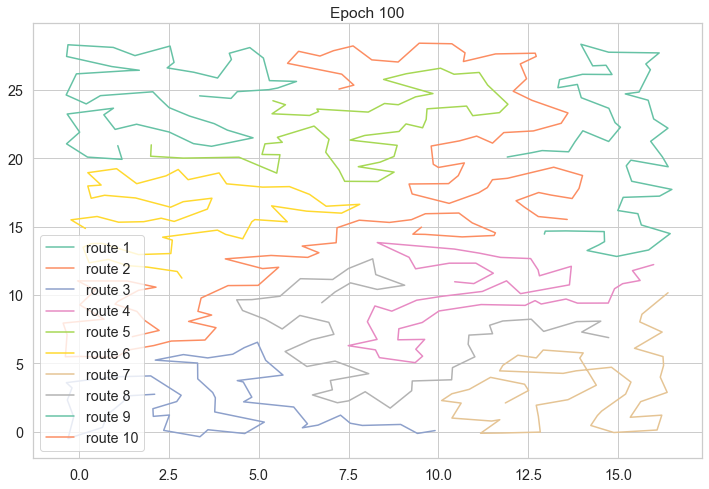

In [127]:
plot_checkpoints(101, 'test_results/checkpoints')